In [16]:
# read in data
words = open('names.txt', 'r').read().splitlines()

In [17]:
# inspect first ten names
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
# find min length name
min(len(word) for word in words)

2

In [5]:
# find max length name
max(len(word) for word in words)

15

In [6]:
# analysis using python dictionary
b = {}
for word in words:
    word = ['<S>'] + list(word) + ['<E>']
    # zip creating an interable for each iterator, stopping when shortest iterator exhausted
    for ch1, ch2 in zip(word, word[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [7]:
import torch

In [8]:
# initiating torch tensor
N = torch.zeros(27, 27, dtype = torch.int32)

In [9]:
# building a map of characters to ints
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}

In [10]:
# adding special start/stop character
stoi['.'] = 0

In [11]:
# analyis using tensor representation
for word in words:
    word = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(word, word[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [12]:
# building map from int to character
itos = {i:s for s,i in stoi.items()}

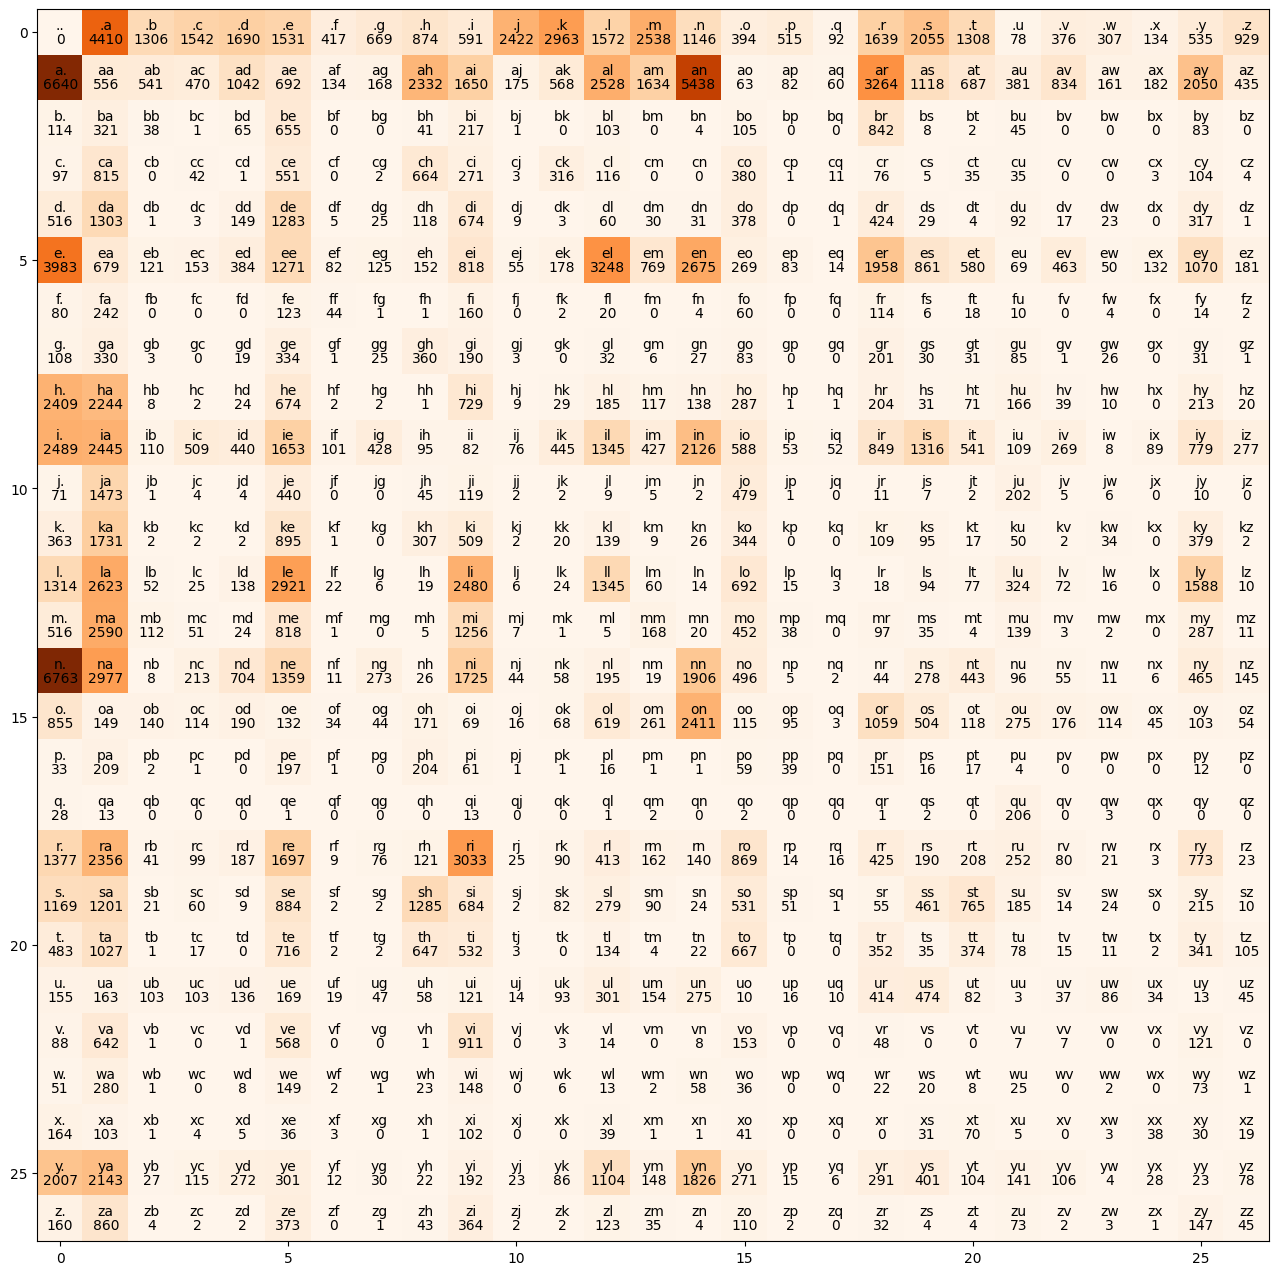

In [13]:
# visualizing data
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Oranges')
for i in range(27):
    for j in range(27):
        chs = itos[i]+itos[j]
        plt.text(j, i, chs, ha = 'center', va = 'bottom', color = 'black')
        plt.text(j, i, N[i, j].item(), ha = 'center', va = 'top', color = 'black')

In [14]:
# creating probabilities from counts
P = N.float()
P = P / P.sum(1, keepdim = True)
P.shape

torch.Size([27, 27])

In [24]:
# using bigram probabilities to generate names
g = torch.Generator().manual_seed(2147483647)
names = []
for i in range(50):
    name = ''
    ix = 0
    while True:
        p = P[ix]
        # sample from the probability distribution of the given first character in the bigram
        ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
        # stop if special character sampled
        if ix == 0:
            break
        name += itos[ix]
    names.append(name)
names

['cexze',
 'momasurailezitynn',
 'konimittain',
 'llayn',
 'ka',
 'da',
 'staiyaubrtthrigotai',
 'moliellavo',
 'ke',
 'teda',
 'ka',
 'emimmsade',
 'enkaviyny',
 'ftlspihinivenvorhlasu',
 'dsor',
 'br',
 'jol',
 'pen',
 'aisan',
 'ja',
 'feniee',
 'zem',
 'deru',
 'firit',
 'gaikajahahbevare',
 'kiysthelenaririenah',
 'keen',
 'x',
 'al',
 'kal',
 'thavazeeromysos',
 'laitenimieegariseriyen',
 'k',
 'illeleldole',
 'meenisammigama',
 'mmin',
 'asharin',
 'alcalar',
 'jayn',
 'asaz',
 'selanely',
 'chay',
 'rana',
 'ai',
 'yviamisashougen',
 'l',
 'beyncaro',
 'allan',
 'annutetoradrilia',
 'rddeman']

In [23]:
# using uniform probability distribution to generate names
names = []
for i in range(50):
    name = ''
    ix = 0
    while True:
        p = torch.ones(1, 27)/27
        # sample from uniform distribution
        ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
        # stop if special character sampled
        if ix == 0:
            break
        name += itos[ix]
    names.append(name)
names

['vmsrtlowuscx',
 '',
 'jhchflnwsrcvdmxbsgxgu',
 'vjxgwfvaltabecsjbmkoywqzxkxbpkhpixpmofqihnetrzktgkdygmokhlwxjlbv',
 'nyvwrkcpggeqhvmwvtxnrfqgjapcs',
 'gphblunaumttrx',
 'frcplzuggmgjhgjdacbriaxuqijjjekkokpnlrmytbhbwbcmmtnamkroidrycbawpimdmthgirhaioihqbooefcbzxkzzytx',
 'bplwrhfdrgemnlngcvvlkndixz',
 'yblmqzzcqghiqvbqxpcloicinwxanqjjfujkfsahanrpwiohblun',
 'krfdyddpemnqklkr',
 'hubkmqfgaaalllvsqlgyjacv',
 'uqhwdsbxwjemhxrizcrac',
 'epvoautcdyuesalhxeljyzzucx',
 'lvfbk',
 'rrqw',
 'evkjudzbzyyoadqfezfqlexdqjqvcisvqiadebrg',
 'ojmdsryffuysirobaigsghkxzrbcjqbrqasoykcp',
 'cyby',
 'qcbwefd',
 'ousrhluekhnp',
 'mnszziupqbucrquoguhzrbgtjijolzhutcaaf',
 'kqpgbzqmtuypjhldpgiticvrshqogzxqafrjekccwgeagqppos',
 'edvgzffizbjfiafdzxzsfafwntfhpbwzenkxr',
 'laxytyykgfznelcjbgezkegfktkc',
 'wscecqjbrinikmiceqyvhqiykhxmhoazangmkyjssatnthftwdzfblauxsmxcoopy',
 'suuplqpeynfiloogy',
 'mv',
 'txdfklmdbxxrlfvl',
 'edrxthpghiixeokxfmkjzkzlqlctoizelhkstzebfbvpxukgwd',
 'bxdlcstiminuoaf',
 'eizmyvecbvozde',
 

In [25]:
# mean(nll) analysis
log_prob = 0.0
bigram_count = 0
for w in words:
    for ch1, ch2 in zip(w, w[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        p = P[ix1, ix2]
        bigram_count += 1
        log_prob += torch.log(p)

mean_nll = -log_prob / bigram_count

print(f'{mean_nll=}')



mean_nll=tensor(2.5136)


In [26]:
# smoothing to ensure that no possible value is impossible according to the model ("model smoothing")